In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [5]:
if os.getcwd().split('/')[-1] == 'evaluation':
    os.chdir('../')

In [25]:
df_questions = pd.read_csv('evaluation/questions.csv')

In [28]:
df_questions[['ques_id', 'question']]
for index, row in df_questions[['ques_id', 'question']].iterrows():
    print(row['ques_id'])
    print(row['question'])


Q1
What is the purpose of the AI chatbot in the business analytics course?

Q2
What are the basic techniques in text analytics covered in Module 5 of the Business Analytics with Python course?

Q3
What is the business example of using linear regression in the context of business analytics?

Q4
What are the three tasks in the online exam for the Business Analytics with Python course?

Q5
What are some common algorithms used in supervised machine learning?

Q6
What is the purpose of a t-test in business analytics?

Q7
What are the main concepts covered in the Business Analytics with Python course?

Q8
What is the speaker excited to continue in the next module?

Q9
What is the go-to tool for data manipulation and analysis in business analytics?

Q10
What is a confusion matrix in model evaluation?



In [6]:
df_evaluations = pd.read_csv('evaluation/evaluations_v4.csv')

In [32]:
df = df_evaluations.copy()

# Calculate the average of the three columns for each row
df['Average'] = df[['Answer Relevance', 'Faithfulness', 'Contextual Relevancy']].mean(axis=1)

# Sort the DataFrame by the 'Average' column in ascending order
df_sorted = df.sort_values(by='Average')

# Get the 5 rows with the lowest average
top_5_lowest_avg = df_sorted.head(5)



In [34]:
df = df_evaluations.copy()

# Calculate the average of the three columns for each row
df['Average'] = df[['Answer Relevance', 'Faithfulness', 'Contextual Relevancy']].mean(axis=1)

# Sort the DataFrame by the 'Average' column in ascending order
df_sorted = df.sort_values(by='Average')

# Select rows with unique 'ques_id'
unique_rows = []
seen_ids = set()

for index, row in df_sorted.iterrows():
    if row['ques_id'] not in seen_ids:
        unique_rows.append(row)
        seen_ids.add(row['ques_id'])
    if len(unique_rows) == 5:
        break

# Convert the list of unique rows to a DataFrame
top_5_unique_avg = pd.DataFrame(unique_rows)

In [35]:
top_5_unique_avg

,ques_id,context,question,answer,source_doc,Model,Answer Relevance,Answer Relevance - Reason,Faithfulness,Faithfulness - Reason,Contextual Relevancy,Contextual Relevancy - Reason,Average
27,Q8,"Thank you for your participation, and I'm exci...",What is the speaker excited to continue in the...,The speaker is excited to continue the learnin...,course_material/module 2/transcript.txt,TaylorAI/gte-tiny,0.000000,The score is 0.00 because the actual output co...,0.000000,The score is 0.00 because the actual output wr...,1.0,The score is 1.00 because the retrieval contex...,0.333333
25,Q6,"[Slide 1: Title Slide]\nHello again, everyone!...",What is the purpose of a t-test in business an...,A t-test allows us to compare the means of two...,course_material/module 2/transcript.txt,TaylorAI/gte-tiny,0.000000,The score is 0.00 because the output statement...,0.500000,The score is 0.50 because the actual output in...,1.0,The score is 1.00 because the retrieval contex...,0.500000
28,Q9,"[Slide 1: Title Slide]\nHello, everyone! Welco...",What is the go-to tool for data manipulation a...,The go-to tool for data manipulation and analy...,course_material/module 1/transcript.txt,TaylorAI/gte-tiny,0.000000,The score is 0.00 because the output contains ...,0.666667,The score is 0.67 because the actual output in...,1.0,The score is 1.00 because the retrieval contex...,0.555556
24,Q5,Primer on Business Analytics with Python\nModu...,What are some common algorithms used in superv...,Some common algorithms used in supervised mach...,course_material/module 4/lecture slides.pptx,TaylorAI/gte-tiny,0.428571,The score is 0.43 because the actual output in...,0.857143,The score is 0.86 because the actual output co...,1.0,The score is 1.00 because the retrieval contex...,0.761905
21,Q2,Primer on Business Analytics with Python\nModu...,What are the basic techniques in text analytic...,The basic techniques in text analytics covered...,course_material/module 5/lecture slides.pptx,TaylorAI/gte-tiny,0.500000,The score is 0.50 because while some relevant ...,1.000000,The score is 1.00 because there were no contra...,1.0,The score is 1.00 because the retrieval contex...,0.833333


In [36]:
top_5_ques_ids = top_5_unique_avg['ques_id'].tolist()

# Filter the original DataFrame based on these ques_id values
filtered_df = df[df['ques_id'].isin(top_5_ques_ids)]

In [56]:
top_5_lowest_avg.iloc[1]['Answer Relevance - Reason']

'The score is 0.00 because the output statements are completely irrelevant to addressing the input question about the purpose of a t-test in business analytics.'

In [57]:
top_5_lowest_avg.iloc[1]['question']

'What is the purpose of a t-test in business analytics?\n'

In [53]:
top_5_lowest_avg.iloc[1]['context']

"[Slide 1: Title Slide]\nHello again, everyone! Welcome back to our course on Business Analytics with Python. Today, we're moving on to Module 2. We'll be focusing on basic statistical tests, like the t-test and ANOVA, as well as regression analysis. So, let's dive right in and continue building on the foundation we laid in the last module.\n\n[Slide 2: Introduction]\nBefore we jump into the details, let's discuss why statistical tests are important. In the world of business, we often have hypotheses or theories that we want to test. For example, is there a significant difference in sales between two different regions? Statistical tests help us answer questions like these with confidence.\n\n[Slide 3: What is a t-test?]\nSo, what exactly is a t-test? In simple terms, a t-test allows us to compare the means of two groups to see if they are statistically different. This is incredibly useful in business. For example, it can help us understand if a marketing campaign was more effective in 

In [54]:
top_5_lowest_avg.iloc[1]['answer']

'A t-test allows us to compare the means of two groups to see if they are statistically different. This can help understand if a marketing campaign was more effective in one region compared to another.'

In [ ]:
top_5_lowest_avg.iloc[1]['answer']

In [52]:
top_5_lowest_avg

,ques_id,context,question,answer,source_doc,Model,Answer Relevance,Answer Relevance - Reason,Faithfulness,Faithfulness - Reason,Contextual Relevancy,Contextual Relevancy - Reason,Average
27,Q8,"Thank you for your participation, and I'm exci...",What is the speaker excited to continue in the...,The speaker is excited to continue the learnin...,course_material/module 2/transcript.txt,TaylorAI/gte-tiny,0.000000,The score is 0.00 because the actual output co...,0.000000,The score is 0.00 because the actual output wr...,1.0,The score is 1.00 because the retrieval contex...,0.333333
25,Q6,"[Slide 1: Title Slide]\nHello again, everyone!...",What is the purpose of a t-test in business an...,A t-test allows us to compare the means of two...,course_material/module 2/transcript.txt,TaylorAI/gte-tiny,0.000000,The score is 0.00 because the output statement...,0.500000,The score is 0.50 because the actual output in...,1.0,The score is 1.00 because the retrieval contex...,0.500000
28,Q9,"[Slide 1: Title Slide]\nHello, everyone! Welco...",What is the go-to tool for data manipulation a...,The go-to tool for data manipulation and analy...,course_material/module 1/transcript.txt,TaylorAI/gte-tiny,0.000000,The score is 0.00 because the output contains ...,0.666667,The score is 0.67 because the actual output in...,1.0,The score is 1.00 because the retrieval contex...,0.555556
24,Q5,Primer on Business Analytics with Python\nModu...,What are some common algorithms used in superv...,Some common algorithms used in supervised mach...,course_material/module 4/lecture slides.pptx,TaylorAI/gte-tiny,0.428571,The score is 0.43 because the actual output in...,0.857143,The score is 0.86 because the actual output co...,1.0,The score is 1.00 because the retrieval contex...,0.761905
8,Q9,"[Slide 1: Title Slide]\nHello, everyone! Welco...",What is the go-to tool for data manipulation a...,The go-to tool for data manipulation and analy...,course_material/module 1/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.428571,The score is 0.43 because the output contains ...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.809524


In [9]:
df_evaluations.columns

Index(['ques_id', 'context', 'question', 'answer', 'source_doc', 'Model',
       'Answer Relevance', 'Answer Relevance - Reason', 'Faithfulness',
       'Faithfulness - Reason', 'Contextual Relevancy',
       'Contextual Relevancy - Reason'],
      dtype='object')

In [ ]:
df[df['Model'] == 'TaylorAI/gte-tiny']['Answer Relevance'].min()

In [7]:
df_evaluations

,ques_id,context,question,answer,source_doc,Model,Answer Relevance,Answer Relevance - Reason,Faithfulness,Faithfulness - Reason,Contextual Relevancy,Contextual Relevancy - Reason
0,Q1,- **AI Chatbot**: An AI chatbot is available f...,What is the purpose of the AI chatbot in the b...,The AI chatbot is designed to answer frequentl...,course_material/general/syllabus.md,sentence-transformers/all-MiniLM-L6-v2,0.750000,The score is 0.75 because the answer mostly ad...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because there were no reason...
1,Q2,Primer on Business Analytics with Python\nModu...,What are the basic techniques in text analytic...,The basic techniques in text analytics covered...,course_material/module 5/lecture slides.pptx,sentence-transformers/all-MiniLM-L6-v2,1.000000,The score is 1.00 because the output is fully ...,0.866667,The score is 0.87 because the actual output in...,1.0,The score is 1.00 because the retrieval contex...
2,Q3,Primer on Business Analytics \nwith Python\nMo...,What is the business example of using linear r...,Predicting sales based on advertising spend.,course_material/module 2/lecture slides.pdf,sentence-transformers/all-MiniLM-L6-v2,0.833333,The score is 0.83 because the majority of the ...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...
3,Q4,Primer on Business Analytics with Python\nModu...,What are the three tasks in the online exam fo...,The three tasks in the online exam are Code In...,course_material/module 6/lecture slides.pptx,sentence-transformers/all-MiniLM-L6-v2,0.875000,The score is 0.88 because the answer effective...,1.000000,The score is 1.00 because there were no contra...,1.0,The score is 1.00 because the retrieval contex...
4,Q5,Primer on Business Analytics with Python\nModu...,What are some common algorithms used in superv...,Some common algorithms used in supervised mach...,course_material/module 4/lecture slides.pptx,sentence-transformers/all-MiniLM-L6-v2,0.916667,The score is 0.92 because the answer is highly...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...
5,Q6,"[Slide 1: Title Slide]\nHello again, everyone!...",What is the purpose of a t-test in business an...,A t-test allows us to compare the means of two...,course_material/module 2/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.800000,The score is 0.80 because the explanation abou...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...
6,Q7,# Primer on Business Analytics with Python\n##...,What are the main concepts covered in the Busi...,The main concepts covered in the course are ba...,course_material/module 6/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.947368,The score is 0.95 because the answer is highly...,0.823529,The score is 0.82 because the actual output in...,1.0,The score is 1.00 because there are no reasons...
7,Q8,"Thank you for your participation, and I'm exci...",What is the speaker excited to continue in the...,The speaker is excited to continue the learnin...,course_material/module 2/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.250000,The score is 0.25 because the response include...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...
8,Q9,"[Slide 1: Title Slide]\nHello, everyone! Welco...",What is the go-to tool for data manipulation a...,The go-to tool for data manipulation and analy...,course_material/module 1/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.750000,The score is 0.75 because the main response co...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...
9,Q10,- Split data into training and test sets for u...,What is a confusion matrix in model evaluation?\n,A confusion matrix is a table that describes 

In [ ]:
df_evaluations['Model']

In [25]:
df_evaluations['Model'].unique()

array(['sentence-transformers/all-MiniLM-L6-v2',
       'sentence-transformers/all-MiniLM-L12-v2', 'TaylorAI/gte-tiny'],
      dtype=object)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

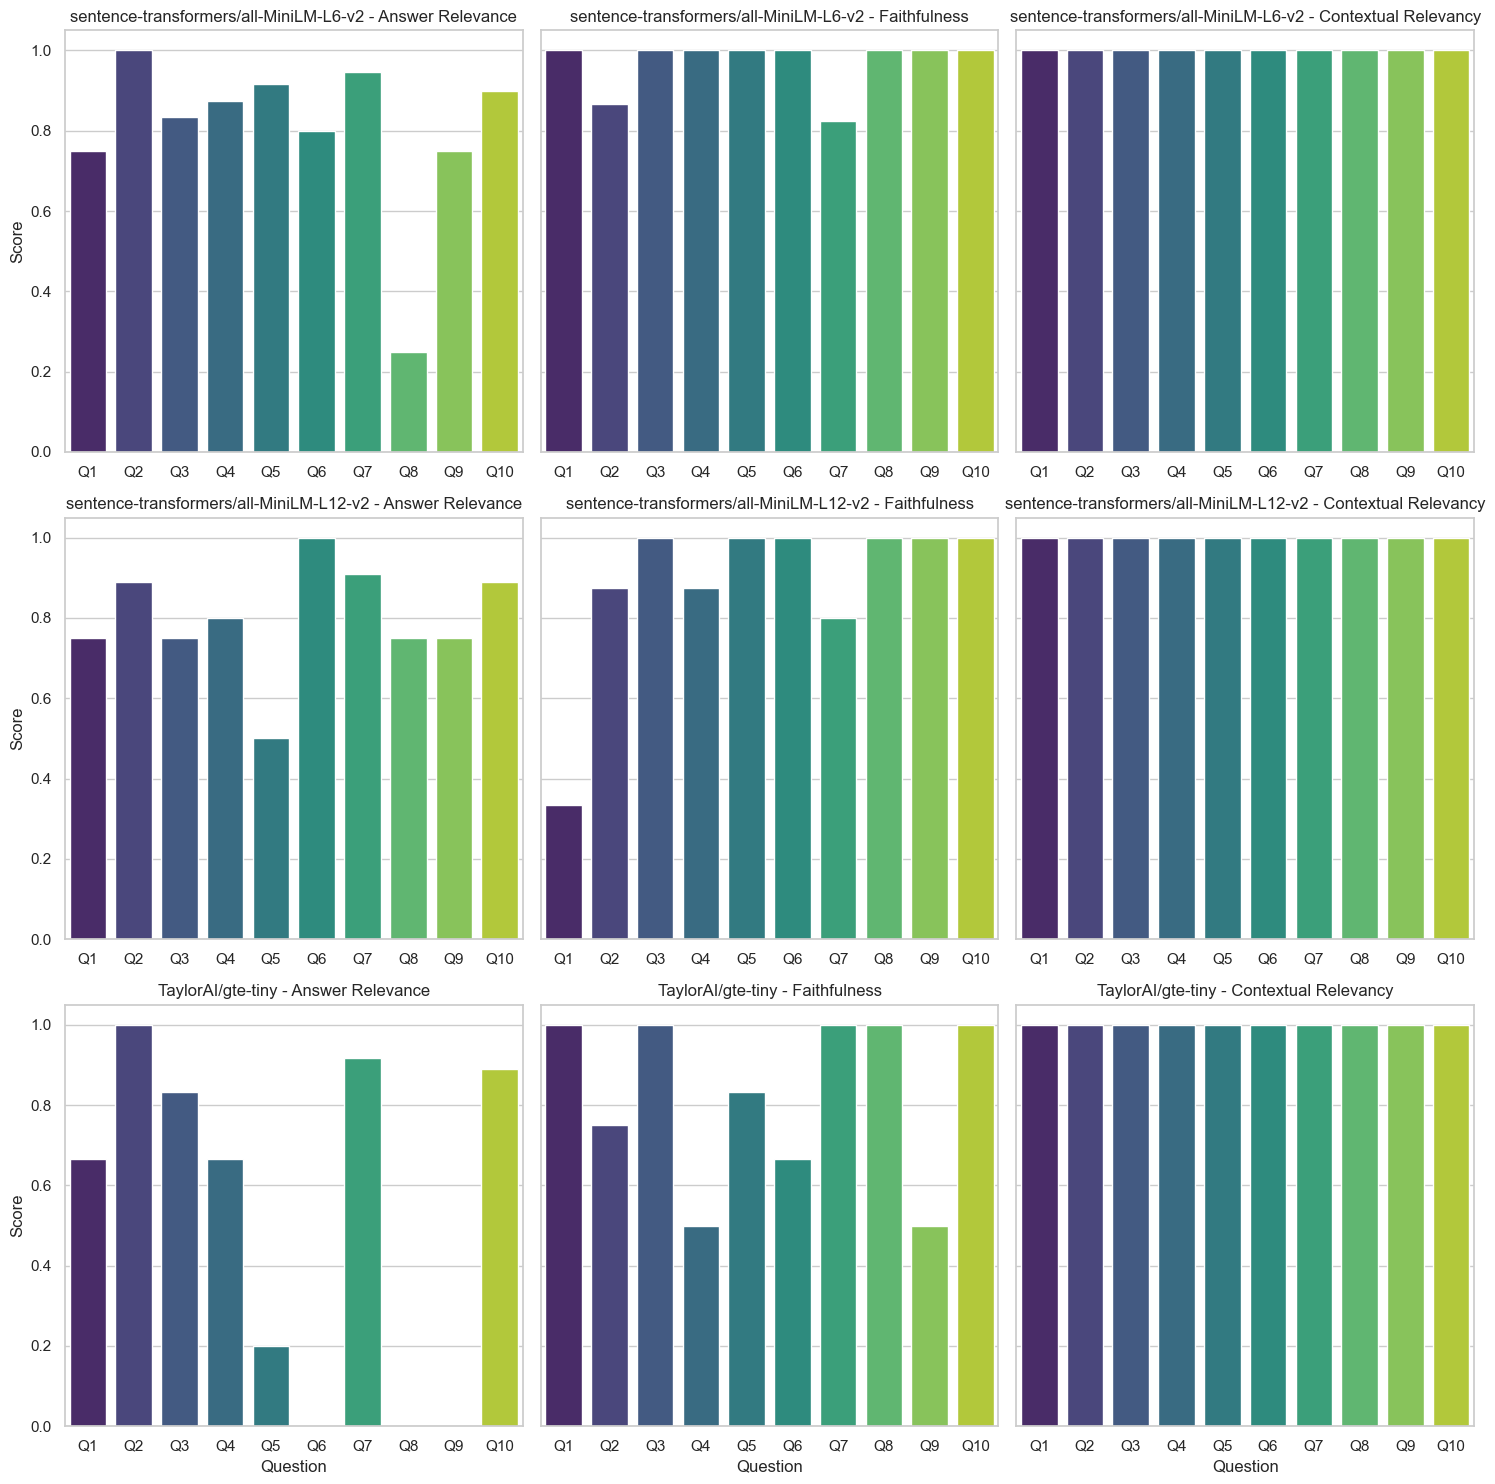

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")
df = df_evaluations
# Create a figure with a subplot for each model and metric
models = df['Model'].unique()
metrics = ['Answer Relevance', 'Faithfulness', 'Contextual Relevancy']
num_models = len(models)
num_metrics = len(metrics)

fig, axes = plt.subplots(num_models, num_metrics, figsize=(15, 5 * num_models), sharey=True)

# Plot each model and metric
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        # sns.barplot(x='Model', y=metric, data=df[df['Model'] == model], ax=ax)
        sns.barplot(x='ques_id', y=metric, data=df[df['Model'] == model], ax=ax, palette='viridis')
        # sns.barplot(data=df_model, x=df_model['ques_id'], y='Faithfulness', palette='viridis')

        ax.set_title(f'{model} - {metric}')
        if j == 0:
            ax.set_ylabel('Score')
        else:
            ax.set_ylabel('')
        if i == num_models - 1:
            ax.set_xlabel('Question')
        else:
            ax.set_xlabel('')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_evaluation(model, df):
    # Set the style of seaborn
    sns.set(style="whitegrid")
    # Create a figure with a subplot for each model and metric
    metrics = ['Answer Relevance', 'Faithfulness', 'Contextual Relevancy']
    num_metrics = len(metrics)

    fig, axes = plt.subplots(1, num_metrics, figsize=(15, 5), sharey=True)

    for j, metric in enumerate(metrics):
        ax = axes[j]
        sns.barplot(x='ques_id', y=metric, data=df[df['Model'] == model], ax=ax, palette='viridis')

        ax.set_title(metric)
        if j == 0:
            ax.set_ylabel('Score')
        else:
            ax.set_ylabel('')
        if i == num_models - 1:
            ax.set_xlabel('Question')
        else:
            ax.set_xlabel('')

    fig.suptitle(model)
    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [38]:
filtered_df

,ques_id,context,question,answer,source_doc,Model,Answer Relevance,Answer Relevance - Reason,Faithfulness,Faithfulness - Reason,Contextual Relevancy,Contextual Relevancy - Reason,Average
1,Q2,Primer on Business Analytics with Python\nModu...,What are the basic techniques in text analytic...,The basic techniques in text analytics covered...,course_material/module 5/lecture slides.pptx,sentence-transformers/all-MiniLM-L6-v2,0.857143,The score is 0.86 because the primary content ...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.952381
4,Q5,Primer on Business Analytics with Python\nModu...,What are some common algorithms used in superv...,Some common algorithms used in supervised mach...,course_material/module 4/lecture slides.pptx,sentence-transformers/all-MiniLM-L6-v2,0.888889,The score is 0.89 because the answer mostly pr...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.962963
5,Q6,"[Slide 1: Title Slide]\nHello again, everyone!...",What is the purpose of a t-test in business an...,A t-test allows us to compare the means of two...,course_material/module 2/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.800000,The score is 0.80 because while the main expla...,0.750000,The score is 0.75 because the actual output in...,1.0,The score is 1.00 because the retrieval contex...,0.850000
7,Q8,"Thank you for your participation, and I'm exci...",What is the speaker excited to continue in the...,The speaker is excited to continue the learnin...,course_material/module 2/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.666667,The score is 0.67 because the statement 'For m...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.888889
8,Q9,"[Slide 1: Title Slide]\nHello, everyone! Welco...",What is the go-to tool for data manipulation a...,The go-to tool for data manipulation and analy...,course_material/module 1/transcript.txt,sentence-transformers/all-MiniLM-L6-v2,0.428571,The score is 0.43 because the output contains ...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.809524
11,Q2,Primer on Business Analytics with Python\nModu...,What are the basic techniques in text analytic...,The basic techniques in text analytics covered...,course_material/module 5/lecture slides.pptx,sentence-transformers/all-MiniLM-L12-v2,0.714286,The score is 0.71 because the answer partially...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.904762
14,Q5,Primer on Business Analytics with Python\nModu...,What are some common algorithms used in superv...,Some common algorithms used in supervised mach...,course_material/module 4/lecture slides.pptx,sentence-transformers/all-MiniLM-L12-v2,0.888889,The score is 0.89 because the response is most...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.962963
15,Q6,"[Slide 1: Title Slide]\nHello again, everyone!...",What is the purpose of a t-test in business an...,A t-test allows us to compare the means of two...,course_material/module 2/transcript.txt,sentence-transformers/all-MiniLM-L12-v2,0.800000,The score is 0.80 because the response accurat...,1.000000,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because the retrieval contex...,0.933333
17,Q8,"Thank you for your participation, and I'm exci...",What is the speaker excited to continue in the...,The speaker is excited to continue the learnin...,course_material/module 2/transcript.txt,sentence-transformers/all-MiniLM-L12-v2,0.500000,The score is 0.50 because although the answer ...,1.000000,The score is 1.00 because there were no contra...,1.0,The score is 1.00 because the retrieval contex...,0.833333
18,Q9,"[Slide 1: Title Slide]\nHello, ev

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

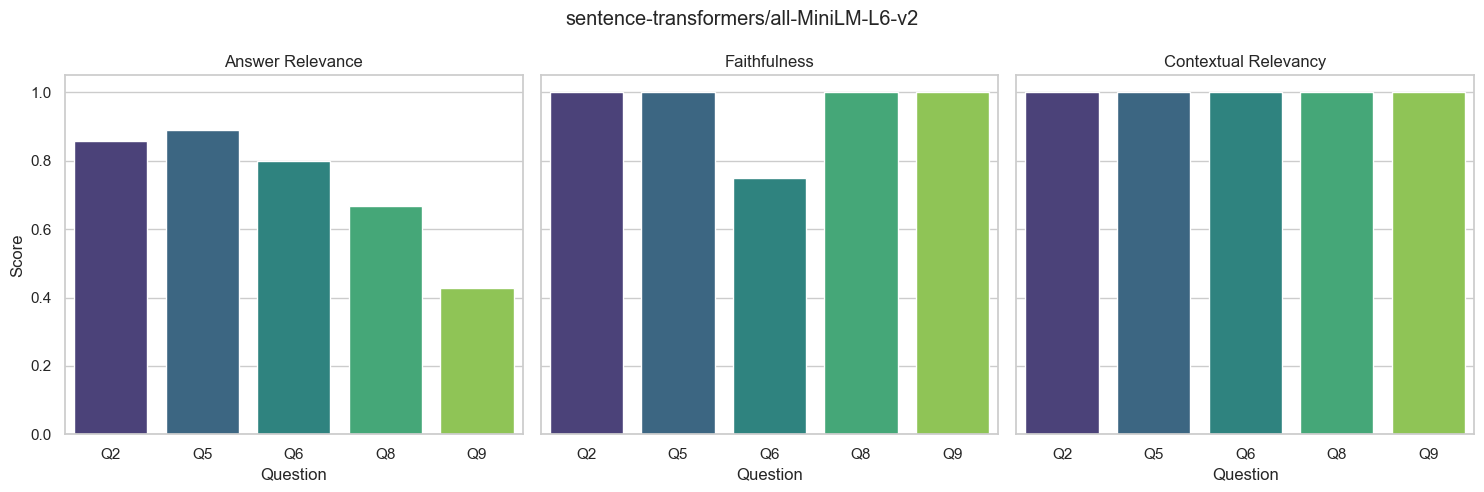

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

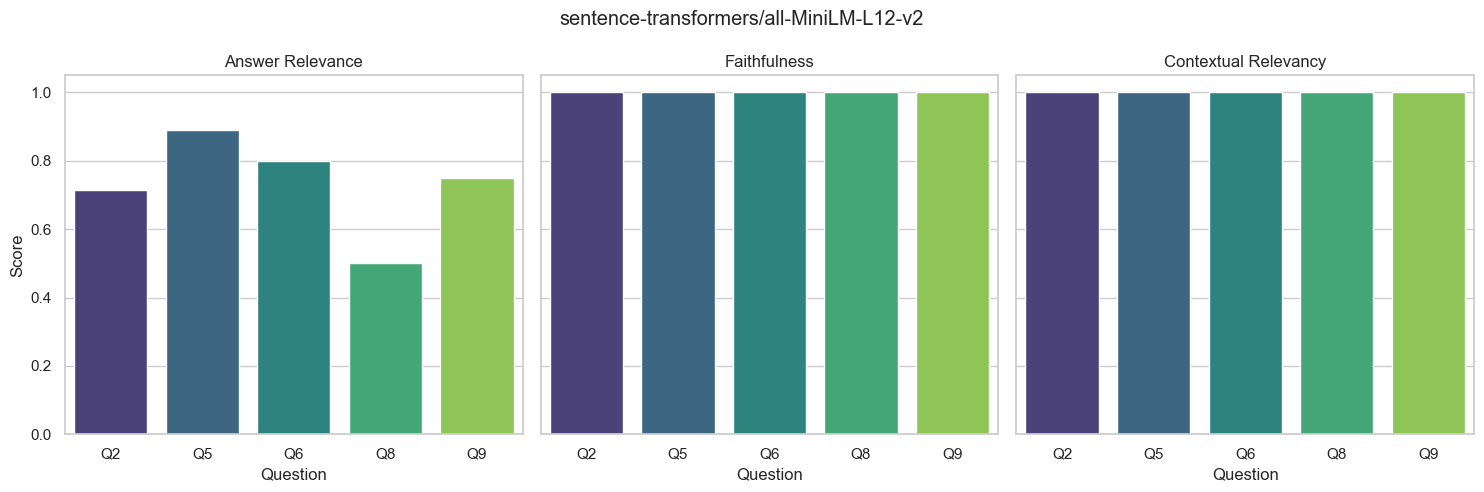

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

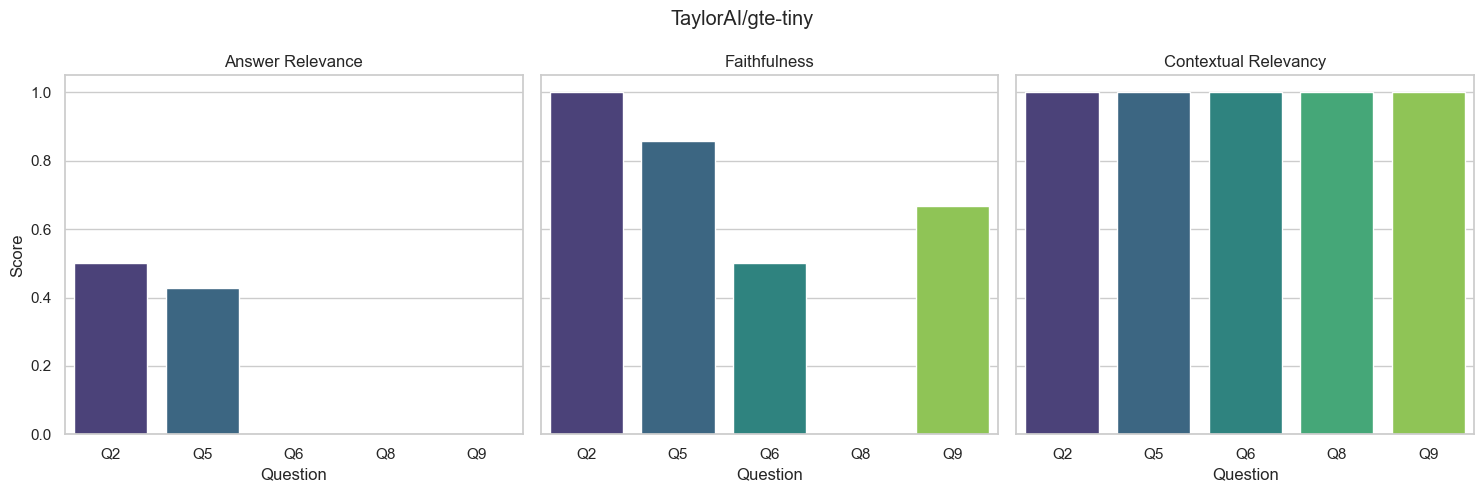

In [40]:
for model in filtered_df['Model'].unique():
    plot_evaluation(model,filtered_df )

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


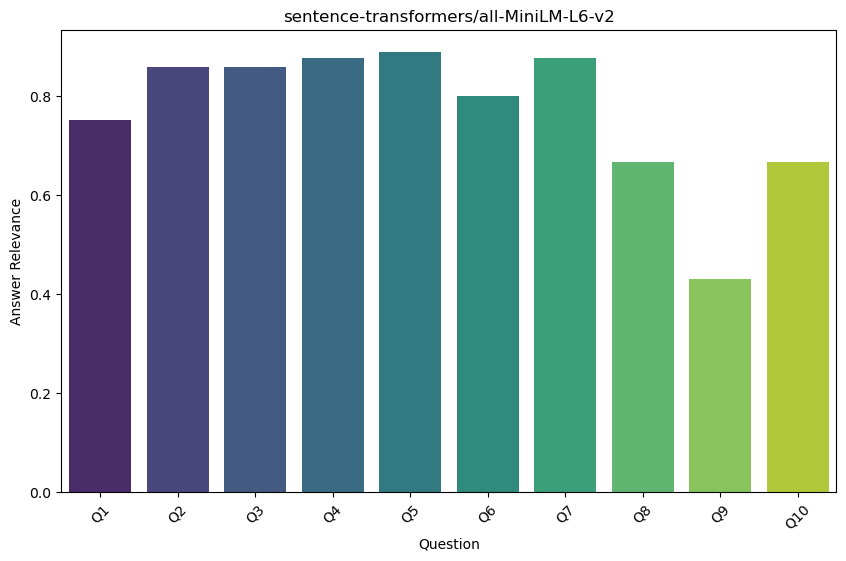

In [7]:
df_model = df_evaluations[df_evaluations['Model'] == 'sentence-transformers/all-MiniLM-L6-v2']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_model, x=df_model['ques_id'], y='Answer Relevance', palette='viridis')
plt.title('sentence-transformers/all-MiniLM-L6-v2')
plt.xlabel('Question')
plt.ylabel('Answer Relevance')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


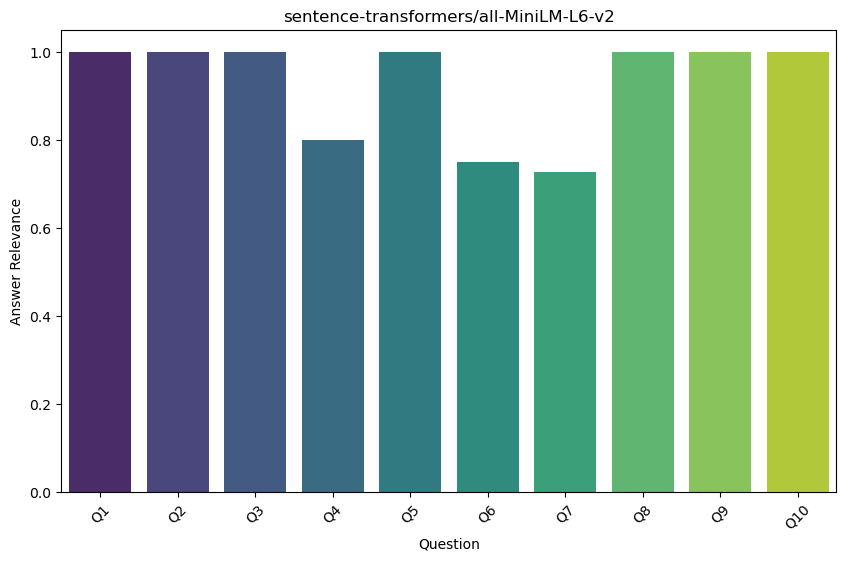

In [8]:
df_model = df_evaluations[df_evaluations['Model'] == 'sentence-transformers/all-MiniLM-L6-v2']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_model, x=df_model['ques_id'], y='Faithfulness', palette='viridis')
plt.title('sentence-transformers/all-MiniLM-L6-v2')
plt.xlabel('Question')
plt.ylabel('Answer Relevance')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


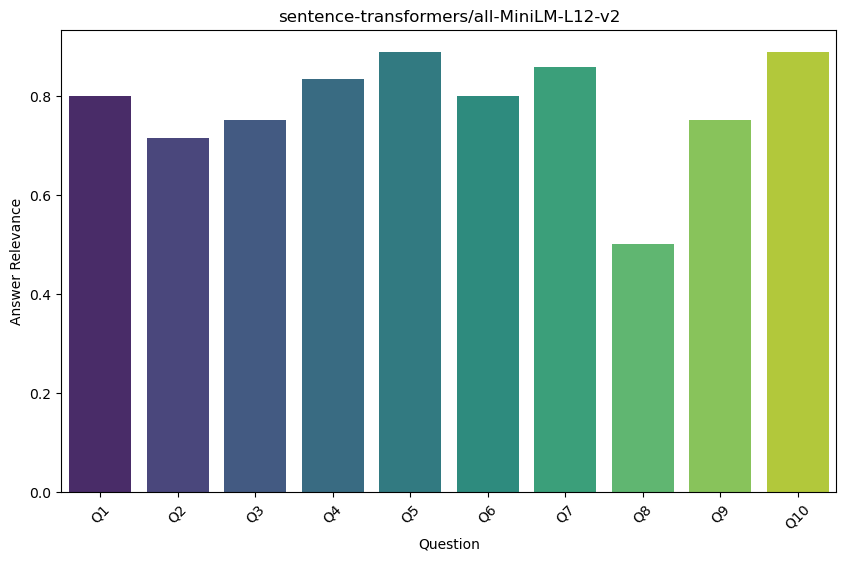

In [6]:
df_model = df_evaluations[df_evaluations['Model'] == 'sentence-transformers/all-MiniLM-L12-v2']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_model, x=df_model['ques_id'], y='Answer Relevance', hue='' ,palette='viridis')
plt.title('sentence-transformers/all-MiniLM-L12-v2')
plt.xlabel('Question')
plt.ylabel('Answer Relevance')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


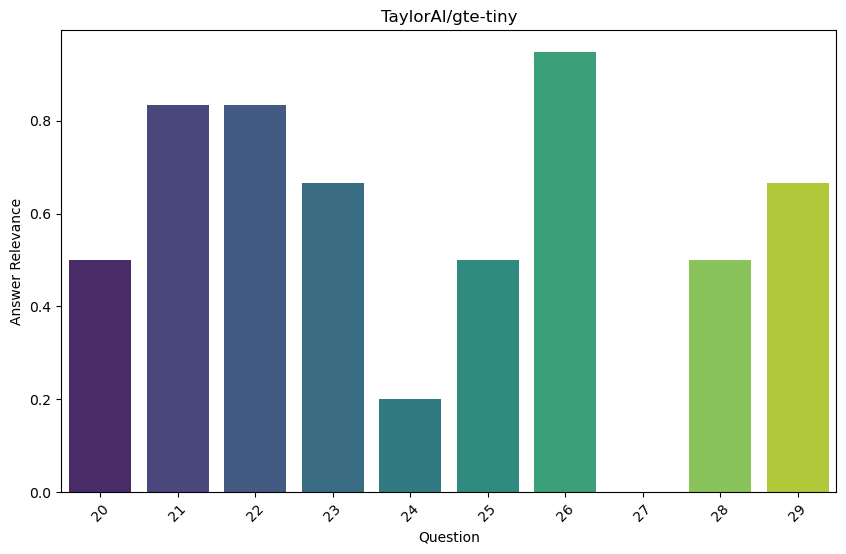

In [30]:
df_model = df_evaluations[df_evaluations['Model'] == 'TaylorAI/gte-tiny']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_model, x=df_model.index, y='Answer Relevance', palette='viridis')
plt.title('TaylorAI/gte-tiny')
plt.xlabel('Question')
plt.ylabel('Answer Relevance')
plt.xticks(rotation=45)
plt.show()